In [7]:
import time
from datetime import datetime, timedelta, timezone
from fingrid_api import get_fingrid_data
from plotting_utils import combine_and_plot


/var/folders/l4/zf6bhbp92mgck8f6xt_f1vqh0000gn/T/ipykernel_61439/4088277210.py:10: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.utcnow()


Fetching data for dataset 181...
Data for dataset 181 appended.
Waiting 5 seconds before next request...
Fetching data for dataset 188...
Data for dataset 188 appended.
Waiting 5 seconds before next request...
Fetching data for dataset 191...
Data for dataset 191 appended.


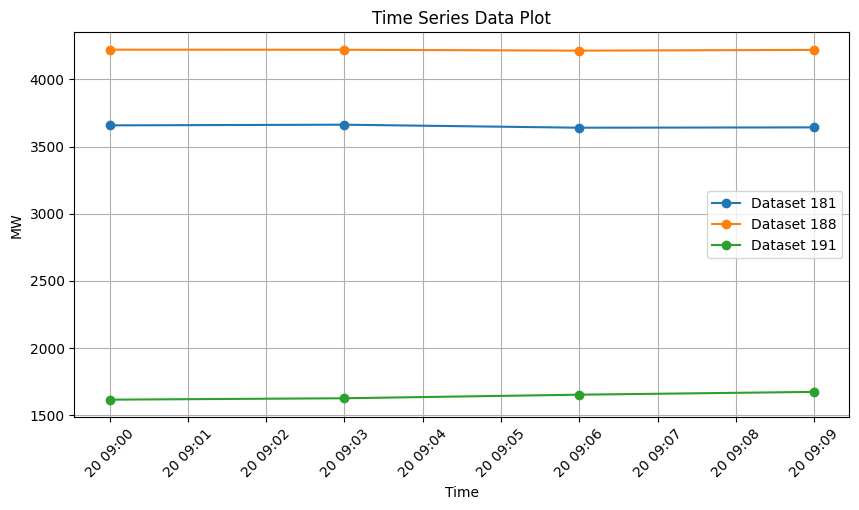

In [9]:
def main():
    """
    Main function to execute the Fingrid data retrieval for multiple datasets,
    append to a single variable, add delays, and plot the data.
    """
    api_key = '83771ac864964981b6f01d045fa111fb'  # Replace with your actual API key
    dataset_ids = [181, 188, 191]
    delay_seconds = 5  # Set the delay in seconds

    now = datetime.utcnow()
    start_time = now - timedelta(minutes=15)
    end_time = now

    all_data = []  # Initialize an empty list to store all data

    for i, dataset_id in enumerate(dataset_ids):
        print(f"Fetching data for dataset {dataset_id}...")
        data = get_fingrid_data(api_key, dataset_id, start_time, end_time)

        if data:
            all_data.extend(data)
            print(f"Data for dataset {dataset_id} appended.")
        else:
            print(f"Failed to retrieve data for dataset {dataset_id}.")

        if i < len(dataset_ids) - 1:
            print(f"Waiting {delay_seconds} seconds before next request...")
            time.sleep(delay_seconds)

    if all_data:
        combine_and_plot(all_data)
    else:
        print("\nNo data retrieved.")

if __name__ == "__main__":
    main()